# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Dave Matthew Peter Lumban Tobing
- **Email:** m010d4ky3092@bangkit.academy

## Menentukan Pertanyaan Bisnis

- Bagaimana distribusi data untuk Casual vs Registered User ?
- Apakah ada bulan atau musim tertentu dengan permintaan sewa sepeda yang lebih tinggi?

## Import Semua Packages/Library yang Digunakan

In [97]:
from scipy.stats import mstats
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as scp
import plotly.express as px
import matplotlib.pyplot as plt
from numpy.polynomial.polynomial import polyfit

## Data Wrangling

### Gathering Data

##### Membaca file day.csv dan hour.csv

In [98]:
df_day = pd.read_csv('day.csv')
df_hour = pd.read_csv('hour.csv')

### Assessing Data

##### Melihat jumlah data dan jumlah atribut pada dataset day.csv

In [99]:
total_rows, total_attributes = df_day.shape
print('Jumlah data:', total_rows)
print("Jumlah atribut:", total_attributes)

df_day.head()

Jumlah data: 731
Jumlah atribut: 16


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


##### Melihat jumlah data dan jumlah atribut pada dataset hour.csv

In [100]:
total_rows, total_attributes = df_hour.shape
print('Jumlah data:', total_rows)
print("Jumlah atribut:", total_attributes)

df_hour.head()

Jumlah data: 17379
Jumlah atribut: 17


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


#### Cek duplicate, missing values, descriptive statistics, tipe data dan outlier pada dataset day.csv

In [101]:
print("Total data duplikat adalah: " + str(df_day.duplicated().sum()) + " Data")

Total data duplikat adalah: 0 Data


In [102]:
missing_values = df_day.isnull().sum()
print("Missing Values:" + str(missing_values))

Missing Values:instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [103]:
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [104]:
def count_outliers(data, columns):
    outlier_counts = {}

    for column in columns:
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        column_outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
        outlier_counts[column] = len(column_outliers)
    return outlier_counts

In [105]:
def percentage_of_outliers(data, columns):
    outlier_percentages = {}

    for column in columns:
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        column_outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
        percentage_outliers = (len(column_outliers) / len(data)) * 100
        outlier_percentages[column] = percentage_outliers
    return outlier_percentages

In [106]:
int_columns = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']

outliers_df = count_outliers(df_day, int_columns)

print("Outliers in each columns:")
print(outliers_df)

Outliers in each columns:
{'temp': 0, 'atemp': 0, 'hum': 2, 'windspeed': 13, 'casual': 44, 'registered': 0, 'cnt': 0}


In [107]:
outlier_percentages_dict = percentage_of_outliers(df_day, int_columns)

print("Percentage of Outliers in each Columns:")
for column, percentage in outlier_percentages_dict.items():
    print(f"{column}: {percentage:.2f}%")

Percentage of Outliers in each Columns:
temp: 0.00%
atemp: 0.00%
hum: 0.27%
windspeed: 1.78%
casual: 6.02%
registered: 0.00%
cnt: 0.00%


#### Cek duplicate, missing values, descriptive statistics, tipe data dan outlier pada dataset hour.csv

In [108]:
print("Total data duplikat adalah: " + str(df_hour.duplicated().sum()) + " Data")

Total data duplikat adalah: 0 Data


In [109]:
missing_values = df_hour.isnull().sum()
print("Missing Values:" + str(missing_values))

Missing Values:instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [110]:
df_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [111]:
outliers_df = count_outliers(df_hour, int_columns)

print("Outliers in each columns:")
print(outliers_df)

Outliers in each columns:
{'temp': 0, 'atemp': 0, 'hum': 22, 'windspeed': 342, 'casual': 1192, 'registered': 680, 'cnt': 505}


In [112]:
outlier_percentages_dict = percentage_of_outliers(df_hour, int_columns)

print("Percentage of Outliers in each Columns:")
for column, percentage in outlier_percentages_dict.items():
    print(f"{column}: {percentage:.2f}%")

Percentage of Outliers in each Columns:
temp: 0.00%
atemp: 0.00%
hum: 0.13%
windspeed: 1.97%
casual: 6.86%
registered: 3.91%
cnt: 2.91%


### Cleaning Data

##### Dari data yang telah dikumpulkan terlihat pada dataset tidak terdapat duplicate data dan missing values tetapi terdapat outlier sehingga pada tahap ini kita akan clean data untuk outlier dengan metode log transformation

In [113]:
hour_outlier_columns = ['hum', 'windspeed', 'casual', 'registered', 'cnt']
day_outlier_columns = ['hum', 'windspeed', 'casual']

def handle_outliers_with_transformation(data, columns):
    transformed_data = data.copy()
    for column in columns:
        transformed_data[column] = np.log1p(transformed_data[column])

    return transformed_data

In [114]:
transformed_data_day = handle_outliers_with_transformation(df_day, day_outlier_columns)
outlier_percentages_dict = percentage_of_outliers(transformed_data_day, day_outlier_columns)

print("Percentage of Outliers in Continuous Columns:")
for column, percentage in outlier_percentages_dict.items():
    print(f"{column}: {percentage:.2f}%")

Percentage of Outliers in Continuous Columns:
hum: 0.27%
windspeed: 1.37%
casual: 1.92%


In [115]:
transformed_data_hour = handle_outliers_with_transformation(df_hour, hour_outlier_columns)
outlier_percentages_dict = percentage_of_outliers(transformed_data_hour, hour_outlier_columns)

print("Percentage of Outliers in Continuous Columns:")
for column, percentage in outlier_percentages_dict.items():
    print(f"{column}: {percentage:.2f}%")

Percentage of Outliers in Continuous Columns:
hum: 0.14%
windspeed: 1.32%
casual: 0.00%
registered: 1.29%
cnt: 0.91%


##### Dapat dilihat data sudah mendingan dan persentase outlier untuk dataset hour.csv dan day.csv lebih membaik walaupun masih ada beberapa yang diatas 1% tetapi tidak melebihi 2%

## Exploratory Data Analysis (EDA)

### Explore ...

In [116]:
transformed_data_day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.483402,0.172294,6.351648,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.088669,0.064017,1.010713,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022145,1.098612,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.418710,0.126589,5.757322,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.486533,0.166340,6.570883,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.548242,0.209624,7.000334,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.679302,0.410428,8.134761,6946.000000,8714.000000


In [117]:
transformed_data_day[int_columns].corr()

,temp,atemp,hum,windspeed,casual,registered,cnt
temp,1.000000,0.991702,0.135062,-0.153521,0.670994,0.540012,0.627494
atemp,0.991702,1.000000,0.148591,-0.179435,0.676579,0.544192,0.631066
hum,0.135062,0.148591,1.000000,-0.259656,-0.072623,-0.074533,-0.083913
windspeed,-0.153521,-0.179435,-0.259656,1.000000,-0.200555,-0.215673,-0.231894
casual,0.670994,0.676579,-0.072623,-0.200555,1.000000,0.567907,0.760096
registered,0.540012,0.544192,-0.074533,-0.215673,0.567907,1.000000,0.945517
cnt,0.627494,0.631066,-0.083913,-0.231894,0.760096,0.945517,1.000000


In [118]:
transformed_data_hour.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.479673,0.168871,2.706618,4.378018,4.574739
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.120919,0.101180,1.490040,1.398230,1.417869
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.693147
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.392042,0.099393,1.609438,3.555348,3.713572
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.488580,0.177309,2.890372,4.753590,4.962845
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.576613,0.226099,3.891820,5.398163,5.641907
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,0.693147,0.615564,5.908083,6.787845,6.885510


In [119]:
transformed_data_hour[int_columns].corr()

,temp,atemp,hum,windspeed,casual,registered,cnt
temp,1.000000,0.987672,-0.069017,-0.018471,0.558111,0.346208,0.388694
atemp,0.987672,1.000000,-0.049637,-0.057971,0.555509,0.342982,0.385523
hum,-0.069017,-0.049637,1.000000,-0.290372,-0.370432,-0.320980,-0.336076
windspeed,-0.018471,-0.057971,-0.290372,1.000000,0.106510,0.117692,0.118262
casual,0.558111,0.555509,-0.370432,0.106510,1.000000,0.790693,0.849841
registered,0.346208,0.342982,-0.320980,0.117692,0.790693,1.000000,0.992630
cnt,0.388694,0.385523,-0.336076,0.118262,0.849841,0.992630,1.000000


In [120]:
user_distribution = transformed_data_day.groupby('weekday')[['casual', 'registered']].sum().reset_index()

mean_casual_users = user_distribution['casual'].mean()
std_casual_users = user_distribution['casual'].std()
day_of_peak_casual = user_distribution.loc[user_distribution['casual'].idxmax()]['weekday']

mean_registered_users = user_distribution['registered'].mean()
std_registered_users = user_distribution['registered'].std()
day_of_peak_registered = user_distribution.loc[user_distribution['registered'].idxmax()]['weekday']

print("Distribution of Casual Users by Weekday:")
print(f"Mean Casual User Count: {mean_casual_users:.2f}")
print(f"Standard Deviation of Casual User Count: {std_casual_users:.2f}")
print(f"Peak Day for Casual Users: {day_of_peak_casual}")

print("\nDistribution of Registered Users by Weekday:")
print(f"Mean Registered User Count: {mean_registered_users:.2f}")
print(f"Standard Deviation of Registered User Count: {std_registered_users:.2f}")
print(f"Peak Day for Registered Users: {day_of_peak_registered}")

Distribution of Casual Users by Weekday:
Mean Casual User Count: 663.29
Standard Deviation of Casual User Count: 45.87
Peak Day for Casual Users: 6.0

Distribution of Registered Users by Weekday:
Mean Registered User Count: 381808.86
Standard Deviation of Registered User Count: 48389.85
Peak Day for Registered Users: 4.0


In [121]:
user_distribution = transformed_data_hour.groupby('weekday')[['casual', 'registered']].sum().reset_index()

mean_casual_users = user_distribution['casual'].mean()
std_casual_users = user_distribution['casual'].std()
day_of_peak_casual = user_distribution.loc[user_distribution['casual'].idxmax()]['weekday']

mean_registered_users = user_distribution['registered'].mean()
std_registered_users = user_distribution['registered'].std()
day_of_peak_registered = user_distribution.loc[user_distribution['registered'].idxmax()]['weekday']

print("Distribution of Casual Users by Weekday:")
print(f"Mean Casual User Count: {mean_casual_users:.2f}")
print(f"Standard Deviation of Casual User Count: {std_casual_users:.2f}")
print(f"Peak Day for Casual Users: {day_of_peak_casual}")

print("\nDistribution of Registered Users by Weekday:")
print(f"Mean Registered User Count: {mean_registered_users:.2f}")
print(f"Standard Deviation of Registered User Count: {std_registered_users:.2f}")
print(f"Peak Day for Registered Users: {day_of_peak_registered}")

Distribution of Casual Users by Weekday:
Mean Casual User Count: 6719.76
Standard Deviation of Casual User Count: 822.99
Peak Day for Casual Users: 6.0

Distribution of Registered Users by Weekday:
Mean Registered User Count: 10869.37
Standard Deviation of Registered User Count: 188.81
Peak Day for Registered Users: 5.0


In [122]:
monthly_demand = transformed_data_day.groupby('mnth')['cnt'].sum().reset_index()

mean_monthly_demand = monthly_demand['cnt'].mean()
std_monthly_demand = monthly_demand['cnt'].std()
month_of_peak_demand = monthly_demand.loc[monthly_demand['cnt'].idxmax()]['mnth']

print("Bike Rental Demand by Month:")
print(f"Mean Monthly Demand: {mean_monthly_demand:.2f}")
print(f"Standard Deviation of Monthly Demand: {std_monthly_demand:.2f}")
print(f"Month of Peak Demand: {month_of_peak_demand}")


Bike Rental Demand by Month:
Mean Monthly Demand: 274389.92
Standard Deviation of Monthly Demand: 78533.56
Month of Peak Demand: 8


In [123]:
monthly_demand = transformed_data_hour.groupby('hr')['cnt'].sum().reset_index()

mean_monthly_demand = monthly_demand['cnt'].mean()
std_monthly_demand = monthly_demand['cnt'].std()
month_of_peak_demand = monthly_demand.loc[monthly_demand['cnt'].idxmax()]['hr']

print("Bike Rental Demand by Hour:")
print(f"Mean Hour Demand: {mean_monthly_demand:.2f}")
print(f"Standard Deviation of Hour Demand: {std_monthly_demand:.2f}")
print(f"Hour of Peak Demand: {month_of_peak_demand}")


Bike Rental Demand by Hour:
Mean Hour Demand: 3312.68
Standard Deviation of Hour Demand: 908.25
Hour of Peak Demand: 17.0


- Dari dataset untuk day.csv yang kita dapatkan bahwa casual user paling sering memakai sepeda di hari ke 6 dan untuk registered user di hari ke 4
- Dari dataset untuk hour.csv yang kita dapatkan bahwa casual user paling sering memakai sepeda di hari ke 6 dan untuk registered user di hari ke 5
- Dari dataset untuk hour.csv yang kita dapatkan terlihat bahwa orang - orang paling sering memakai sepeda di jam 17
- Dari dataset untuk day.csv yang kita dapatkan terlihat bahwa orang - orang paling sering memakai sepeda di bulan ke 8


## Visualization & Explanatory Analysis

### Bagaimana distribusi data untuk Casual vs Registered User ?

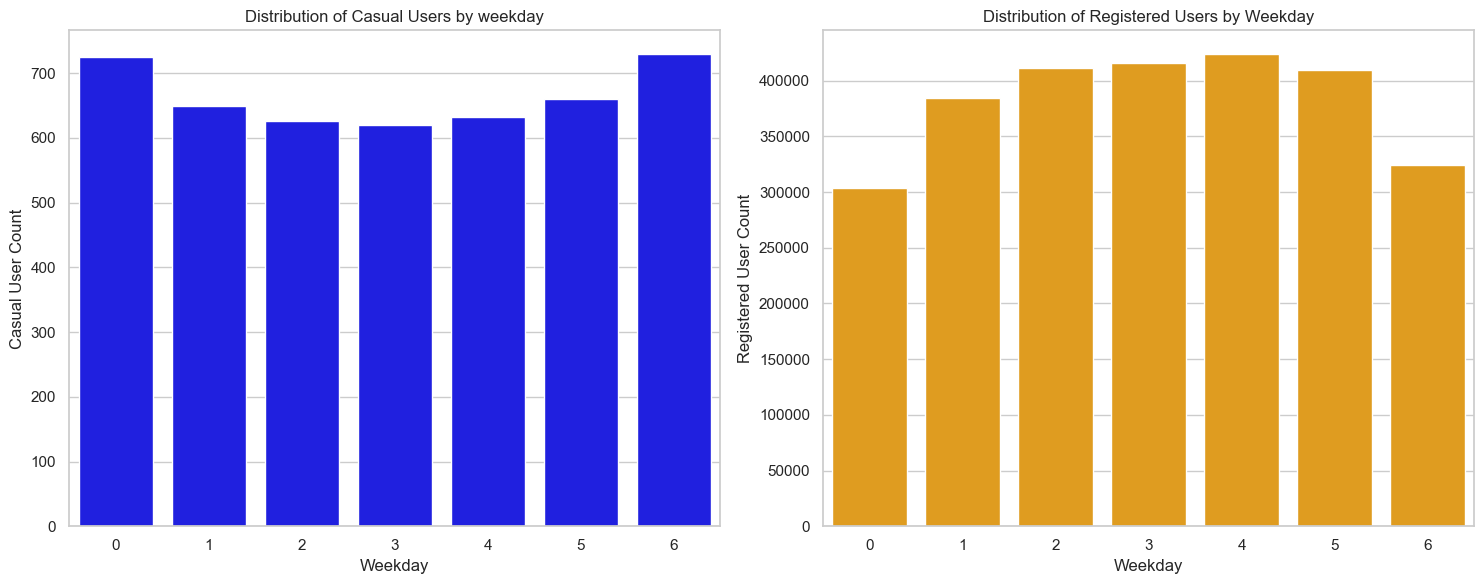

In [124]:
user_distribution = transformed_data_day.groupby('weekday')[['casual', 'registered']].sum().reset_index()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

sns.barplot(x='weekday', y='casual', data=user_distribution, color='blue', ax=axes[0])
axes[0].set_title('Distribution of Casual Users by weekday')
axes[0].set_xlabel('Weekday')
axes[0].set_ylabel('Casual User Count')

sns.barplot(x='weekday', y='registered', data=user_distribution, color='orange', ax=axes[1])
axes[1].set_title('Distribution of Registered Users by Weekday')
axes[1].set_xlabel('Weekday')
axes[1].set_ylabel('Registered User Count')

plt.tight_layout()
plt.show()

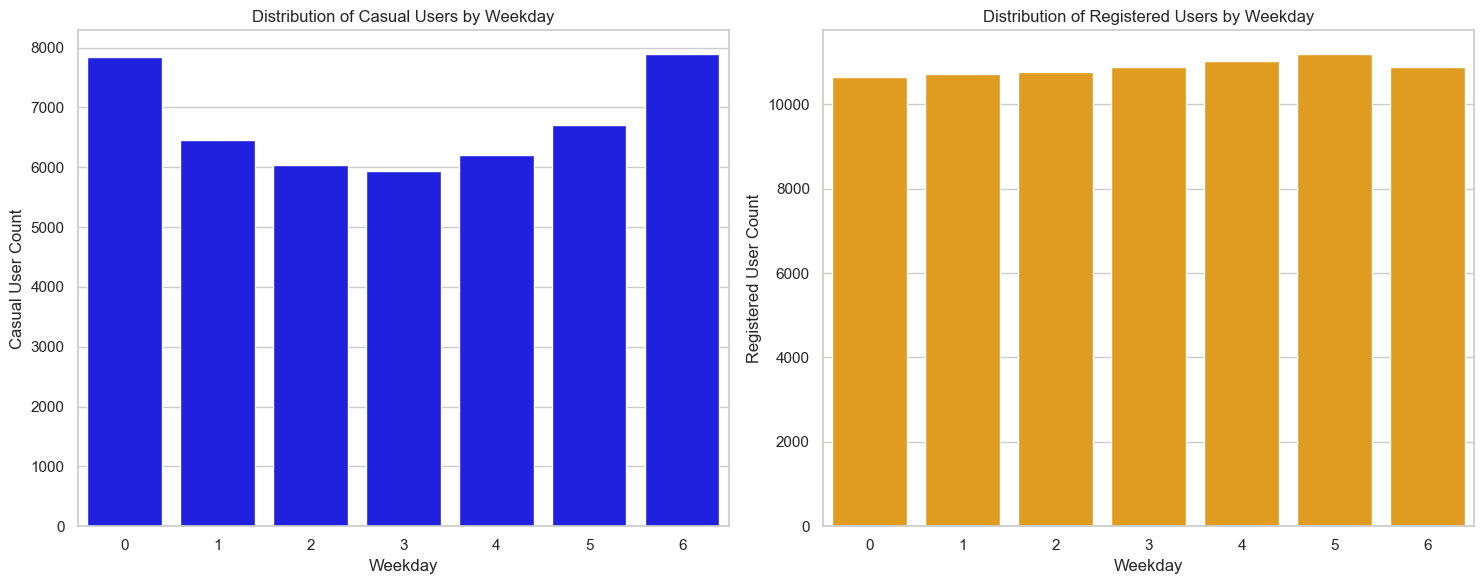

In [125]:
user_distribution = transformed_data_hour.groupby('weekday')[['casual', 'registered']].sum().reset_index()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

sns.barplot(x='weekday', y='casual', data=user_distribution, color='blue', ax=axes[0])
axes[0].set_title('Distribution of Casual Users by Weekday')
axes[0].set_xlabel('Weekday')
axes[0].set_ylabel('Casual User Count')

sns.barplot(x='weekday', y='registered', data=user_distribution, color='orange', ax=axes[1])
axes[1].set_title('Distribution of Registered Users by Weekday')
axes[1].set_xlabel('Weekday')
axes[1].set_ylabel('Registered User Count')

plt.tight_layout()
plt.show()

### Apakah ada bulan atau musim tertentu dengan permintaan sewa sepeda yang lebih tinggi?

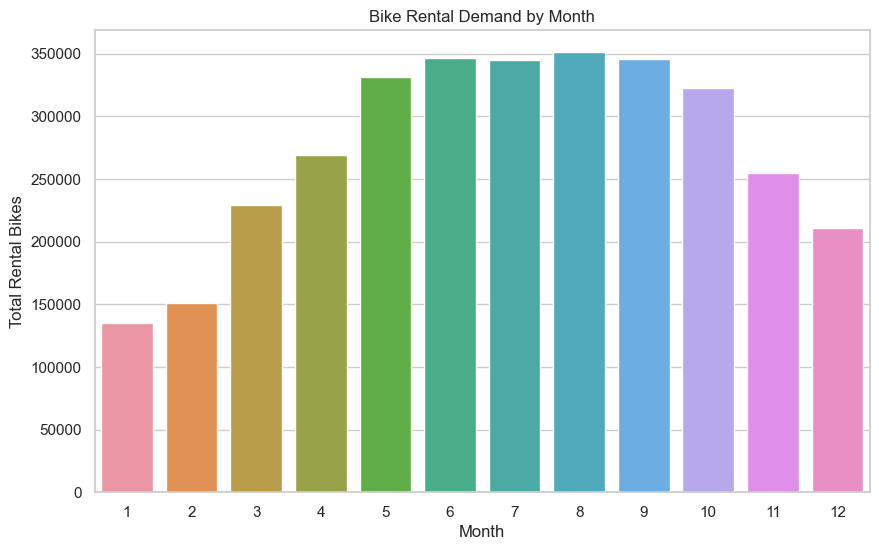

In [126]:
monthly_demand = transformed_data_day.groupby('mnth')['cnt'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='mnth', y='cnt', data=monthly_demand)

plt.title('Bike Rental Demand by Month')
plt.xlabel('Month')
plt.ylabel('Total Rental Bikes')
plt.show()

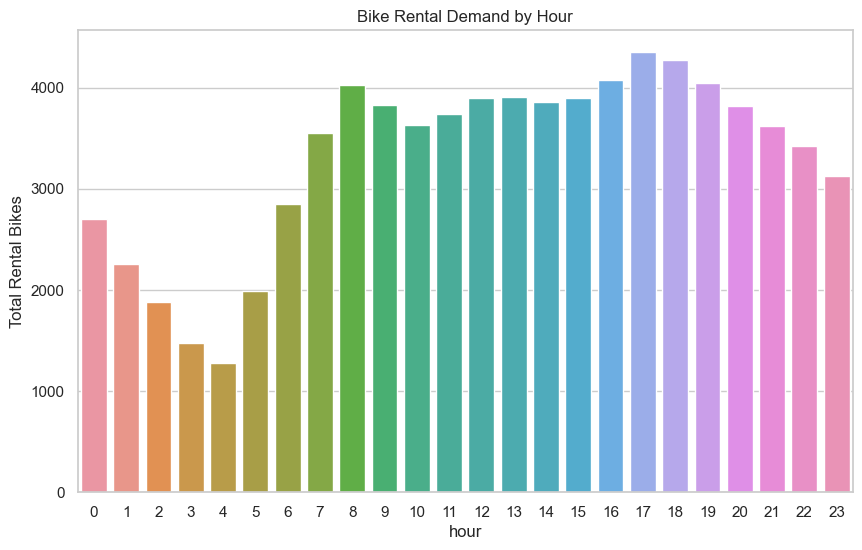

In [127]:
hourly_demand = transformed_data_hour.groupby('hr')['cnt'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='hr', y='cnt', data=hourly_demand)

plt.title('Bike Rental Demand by Hour')
plt.xlabel('hour')
plt.ylabel('Total Rental Bikes')
plt.show()

## Conclusion

- Conclusion pertanyaan 1:
     - Dari Visualisasi data untuk dataset day yang bisa kita lihat terlihat bahwa registered user lebih sering memakai sepeda pada hari ke 1 - 5  sedangkan untuk casual User lebih sering memakai sepeda pada hari ke 0 dan 6
     - Dari Visualisasi data untuk dataset hour yang bisa kita lihat terlihat bahwa registered user lebih sering memakai sepeda pada hari ke 1 - 5  sedangkan untuk casual User lebih sering memakai sepeda pada hari ke 0 dan 6
     - Dari Visualisasi data untuk dataset hour dapat kita lihat bahwa registered user yang memakai sepeda melebihi 10000 sepeda untuk setiap hari sedangkan untuk casual user tidak mencapai 10000 sepeda
- Conclusion pertanyaan 2:
     - Dari Visualisasi data untuk dataset day dapat kita lihat bahwa Sepeda sering dipakai pada bulan 5 sampai bulan 10
     - Dari Visualisasi data untuk dataset hour dapat kita lihat bahwa Sepeda sering dipakai pada jam 8 sampau jam 19


## EXPORT CLEAN FILE

In [128]:
transformed_data_day.to_csv('clean_day.csv', index=False)
transformed_data_hour.to_csv('clean_hour.csv', index=False)